<a href="https://colab.research.google.com/github/swarna32/bangla_news_detector/blob/main/bangla_news_detector_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import re
import string
import bn_lib # bn_lib url: https://drive.google.com/drive/folders/1YVRnDu5_FlaF1SEp0f81v9rtUU6XK_CY?usp=sharing
%pip install bangla-stemmer
from bangla_stemmer.stemmer.stemmer import BanglaStemmer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

real = pd.read_csv('/content/drive/MyDrive/Datasets/LabeledAuthentic-7K.csv') # Authentic News
fake = pd.read_csv('/content/drive/MyDrive/Datasets/LabeledFake-1K.csv') # Fake News

df_merge = pd.concat([fake, real], axis=0)
df_merge.drop(['articleID', 'date', 'F-type'], axis = 1, inplace = True)
# df_merge.isnull().sum()

df = df_merge.sample(frac=1)

In [ ]:

df['news'] = df['headline'] + ' ' + df['content']
df.drop(['headline', 'content'], axis = 1, inplace = True)

cols = [
    'domain', 'category', 'source', 'relation', 'news', 'label'
]

df = df.reindex(labels=cols, axis=1)
df.head()

domain       category                             source  \
5075    prothomalo.com       National  ‡¶â‡¶™‡¶ú‡ßá‡¶≤‡¶æ ‡¶®‡¶ø‡¶∞‡ßç‡¶¨‡¶æ‡¶π‡ßÄ ‡¶ï‡¶∞‡ßç‡¶Æ‡¶ï‡¶∞‡ßç‡¶§‡¶æ (‡¶á‡¶â‡¶è‡¶®‡¶ì)   
608     prothomalo.com         Sports                           Reporter   
5535      bd24live.com       National                           Reporter   
6047  banglanews24.com       Politics    ‡¶ú‡¶æ‡¶§‡ßÄ‡ßü ‡¶™‡¶æ‡¶∞‡ßç‡¶ü‡¶ø‡¶∞ (‡¶ú‡¶æ‡¶™‡¶æ) ‡¶ö‡ßá‡ßü‡¶æ‡¶∞‡¶Æ‡ßç‡¶Ø‡¶æ‡¶®   
2878  banglanews24.com  International                  ‡¶ú‡ßá‡¶≤‡¶æ‡¶∞ ‡¶™‡ßÅ‡¶≤‡¶ø‡¶∂ ‡¶∏‡ßÅ‡¶™‡¶æ‡¶∞   

     relation                                               news  label  
5075  Related  ‡¶Ü.‡¶≤‡ßÄ‡¶ó‡ßá‡¶∞ ‡¶¶‡ßÅ‡¶á ‡¶â‡¶™‡¶¶‡¶≤‡ßá‡¶∞ ‡¶∏‡¶Ç‡¶ò‡¶æ‡¶§ ‡¶è‡ßú‡¶æ‡¶§‡ßá ‡¶ö‡¶∞‡¶≠‡¶¶‡ßç‡¶∞‡¶æ‡¶∏‡¶®‡ßá ‡ßß‡ß™‡ß™ ...    1.0  
608   Related  ‡¶Ü‡¶ú ‡¶≠‡¶æ‡¶∞‡¶§‡ßá‡¶∞ ‡¶¨‡¶ø‡¶™‡¶ï‡ßç‡¶∑‡ßá ‡¶ï‡ßá‡¶Æ‡¶® ‡¶π‡¶¨‡ßá ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶¶‡ßá‡¶∂‡ßá‡¶∞ ‡¶è‡¶ï‡¶æ‡¶¶‡¶∂? ‡¶Ü...    1.0  
5535  Related  ‡¶∂‡¶æ‡ßú‡¶ø ‡¶™‡ßú‡ßÅ‡¶® ‡¶Æ‡¶æ‡¶§‡ßç‡¶∞ ‡ß´ ‡¶∏‡ßá‡¶ï‡ßá‡¶®‡ßç‡¶°‡ßá! (‡¶≠‡¶ø‡¶°‡¶ø‡¶ì) ‡¶∂‡¶æ‡¶°‡¶º‡¶ø ‡¶≠‡¶æ‡¶∞‡¶§...    1.0  
6047  Related  ‡¶á‡¶≠‡¶ø‡¶è‡¶Æ‡ßá‡¶∞ ‡¶™‡¶ï‡ßç‡¶∑‡ßá ‡¶®‡¶á: ‡¶è‡¶∞‡¶∂‡¶æ‡¶¶ ‡¶∞‡¶Ç‡¶™‡ßÅ‡¶∞: ‡¶ú‡¶æ‡¶§‡ßÄ‡ßü ‡¶™‡¶æ‡¶∞‡ßç‡¶ü‡¶ø‡¶∞ (...    1.0  
2878  Related  ‡¶∂‡¶ø‡¶Æ‡¶≤‡¶æ‡ßü ‡¶ó‡¶æ‡ßú‡¶ø ‡¶ó‡¶ø‡¶∞‡¶ø‡¶ñ‡¶æ‡¶¶‡ßá ‡¶™‡ßú‡ßá ‡¶®‡¶ø‡¶π‡¶§ ‡ßß‡ß© ‡¶≠‡¶æ‡¶∞‡¶§‡ßá‡¶∞ ‡¶™‡¶æ‡¶∞‡ßç‡¶¨‡¶§...    1.0

In [ ]:
# NLP

punctuations = bn_lib.punctuations
stopwords = bn_lib.stopwords
stemmer = BanglaStemmer()

def remove_punctuation(txt):
    txt_nopunc = "".join([c for c in txt if c not in punctuations])
    return txt_nopunc

def remove_english_punctuation(txt):
    txt_nopunc = "".join([c for c in txt if c not in string.punctuation])
    return txt_nopunc

def remove_stopwords(txt):
    txt_clean = "".join([word for word in txt if word not in stopwords])
    return txt_clean

def stemming(txt_no_sw):
    stemmed_txt = "".join([stemmer.stem(word) for word in txt_no_sw])
    return stemmed_txt

def tokenize(txt):
    tokens = re.split('\s+', txt)
    return tokens

In [ ]:

df['domain'] = df['domain'].apply(lambda x: x.lower())
df['domain'] = df['domain'].apply(lambda x: remove_punctuation(x))

df['category'] = df['category'].apply(lambda x: x.lower())
df['category'] = df['category'].apply(lambda x: remove_punctuation(x))

df['source'] = df['source'].apply(lambda x: x.lower())
df['source'] = df['source'].apply(lambda x: remove_punctuation(x))

df['relation'] = df['relation'].apply(lambda x: x.lower())
df['relation'] = df['relation'].apply(lambda x: remove_punctuation(x))

df['news'] = df['news'].apply(lambda x: x.lower())
df['news'] = df.news.apply(lambda x: remove_english_punctuation(x))
df['news'] = df.news.apply(lambda x: remove_punctuation(x))
df['news'] = df.news.apply(lambda x: remove_stopwords(x))
df['news'] = df.news.apply(lambda x: stemming(x))
df['news'] = df.news.apply(lambda x: ' '.join(x.split()))

df['label'] = df['label'].apply(lambda x: int(x))

Streaming output truncated to the last 5000 lines.
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applie

In [ ]:
df.head()

domain       category                   source   relation  \
6287  independent24com       national                    ‡¶™‡ßÅ‡¶≤‡¶ø‡¶∂    related   
647     bengalbeatscom  miscellaneous                 reporter  unrelated   
1186   bnbanglafactcom  international                 reporter    related   
6366  banglatribunecom       national  ‡¶∞‡ßá‡¶≤‡¶ì‡ßü‡ßá ‡¶™‡ßÅ‡¶≤‡¶ø‡¶∂‡ßá‡¶∞ ‡¶™‡¶∞‡¶ø‡¶¶‡¶∞‡ßç‡¶∂‡¶ï    related   
2239       bd24livecom  entertainment                 reporter    related   

                                                   news  label  
6287  ‡¶Æ‡¶π‡ßá‡¶∂‡¶ñ‡¶æ‡¶≤‡ßÄ‡¶ü‡ßá‡¶ï‡¶®‡¶æ‡¶´‡ßá ‡¶™‡ßÅ‡¶≤‡¶ø‡¶∂‡ßá‡¶∞ ‡¶∏‡¶ô‡ßç‡¶ó‡ßá ‡¶ó‡ßã‡¶≤‡¶æ‡¶ó‡ßÅ‡¶≤‡¶ø‡¶§‡ßá ‡¶®‡¶ø‡¶π‡¶§ ...      1  
647   ‡¶¨‡¶æ‡¶∞ ‡¶ö‡¶æ‡¶Å‡¶¶‡ßá ‡¶ï ‡¶®‡ßã‡ßü‡¶æ‡¶ñ‡¶æ‡¶≤‡ßç‡¶Ø‡¶æ‡¶∞ ‡¶∏‡¶®‡ßç‡¶ß‡¶æ‡¶® ‡¶™‡ßá‡¶≤‡ßã ‡¶®‡¶æ‡¶∏‡¶æ‡¶∞ ‡¶¨‡¶ø‡¶ú‡ßç...      0  
1186  ‡¶Æ‡¶∏‡¶ú‡¶ø‡¶¶‡ßá ‡¶¨‡¶æ‡ßü‡ßÅ‡¶§‡ßç‡¶Ø‡¶æ‡¶ó‡ßá‡¶∞ ‡¶Ö‡¶™‡¶∞‡¶æ‡¶ß‡ßá ‡¶™‡¶æ‡¶ï‡¶ø‡¶∏‡ßç‡¶§‡¶æ‡¶®‡ßá ‡¶Ø‡ßÅ‡¶¨‡¶ï‡ßá‡¶∞ ‡¶Æ‡ßÉ...      0  
6366  ‡¶ö‡¶ü‡ßç‡¶ü‡¶ó‡ßç‡¶∞‡¶æ‡¶Æ‡ßá ‡¶∞‡ßá‡¶≤‡¶≤‡¶æ‡¶®‡ßá‡¶∞ ‡¶™‡¶æ‡¶∂ ‡¶•‡ßá‡¶ï‡ßá ‡¶Ö‡¶ú‡ßç‡¶û‡¶æ‡¶§ ‡¶Ø‡ßÅ‡¶¨‡¶ï‡ßá‡¶∞ ‡¶≤‡¶æ‡¶∂...      1  
2239  ‡¶∏‡ßç‡¶¨‡¶™‡ßç‡¶®‡ßá ‡¶ï‡¶≤‡ßç‡¶™‡¶®‡¶æ ‡¶ï‡¶∞‡ßá‡¶®‡¶®‡¶ø ‡¶Ö‡¶≠‡¶ø‡¶®‡ßü‡¶∂‡¶ø‡¶≤‡ßç‡¶™‡ßÄ ‡¶π‡¶¨‡ßá‡¶® ‡¶Ø‡ßá ‡¶§‡¶æ‡¶∞‡¶ï...      1

In [ ]:

# saving the file to save 15 mins of my life each time i run this
df.to_csv('clean_news.csv')

In [ ]:

clean_df = pd.read_csv('/content/drive/MyDrive/Datasets/clean_news.csv')
clean_df = clean_df.drop('Unnamed: 0', axis=1)
clean_df['test'] = clean_df.domain + ' ' +  clean_df.category + ' ' + clean_df.source + ' ' + clean_df.relation + ' ' + clean_df.news
clean_df = clean_df.drop(['domain', 'category', 'source', 'relation', 'news'], axis=1)
indx = ['test', 'label']
clean_df = clean_df.reindex(labels = indx, axis = 1)

x = clean_df.drop(['label'], axis = 1)
y = clean_df['label']

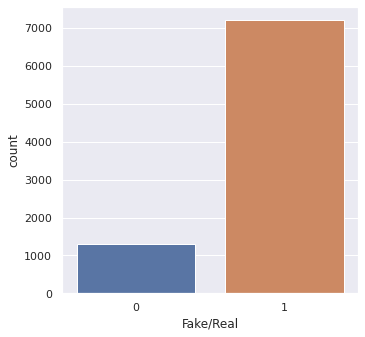

In [ ]:

#Plot total number of real and fake news

import matplotlib.pyplot as plt
%matplotlib inline
# !pip install seaborn
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,5.27)})

plt.subplot(1,2,1)
news_plt = sns.countplot(x = 'label', data = clean_df)
news_plt.set_xlabel('Fake/Real')
plt.show()

In [ ]:

# Classification Begins
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(encoding="utf-8", analyzer=tokenize)
xv = vect.fit_transform(x.test)

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(xv, y, test_size=0.3, random_state=0, stratify=y)

y_train.value_counts() # Imbalance :/

1    5041
0     909
Name: label, dtype: int64

In [ ]:

# Creating Synthetic Fake News To Handle Imbalance

# !pip install imblearn
from imblearn.over_sampling import SMOTE # takes avg of neighboring data and creates new data
smote = SMOTE(sampling_strategy='minority')
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:

from collections import Counter
print('Before SMOTE: ', Counter(y_train))
print('After SMOTE: ', Counter(y_train_smote)) # Balanced Yahoo!!!

Before SMOTE:  Counter({1: 5041, 0: 909})
After SMOTE:  Counter({1: 5041, 0: 5041})


In [ ]:

from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

0.9259114072912583
              precision    recall  f1-score   support

           0       0.83      0.64      0.73       390
           1       0.94      0.98      0.96      2161

    accuracy                           0.93      2551
   macro avg       0.89      0.81      0.84      2551
weighted avg       0.92      0.93      0.92      2551



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


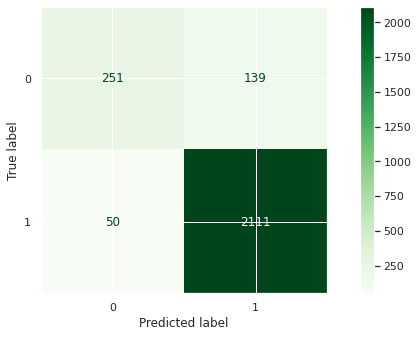

In [ ]:

# Naive Bayes
BNB = BernoulliNB()
BNB.fit(X_train, y_train)
print(BNB.score(X_test, y_test))
pred_NB = BNB.predict(X_test)
print(classification_report(y_test, pred_NB))
# print(confusion_matrix(y_test, pred_NB))
plot_confusion_matrix(BNB, X_test, y_test,cmap="Greens")
plt.show()

0.968639749117993
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       390
           1       0.98      0.98      0.98      2161

    accuracy                           0.97      2551
   macro avg       0.94      0.94      0.94      2551
weighted avg       0.97      0.97      0.97      2551



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


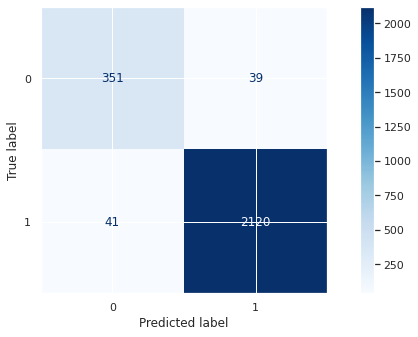

In [ ]:

# Logistic Regression
LR = LogisticRegression(random_state=0)
LR.fit(X_train_smote, y_train_smote)
print(LR.score(X_test, y_test))
pred_LR = LR.predict(X_test)
print(classification_report(y_test, pred_LR))
# print(confusion_matrix(y_test, pred_LR))
plot_confusion_matrix(LR, X_test, y_test,cmap="Blues")
plt.show()

0.9890239121912975
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       390
           1       0.99      1.00      0.99      2161

    accuracy                           0.99      2551
   macro avg       0.99      0.97      0.98      2551
weighted avg       0.99      0.99      0.99      2551



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


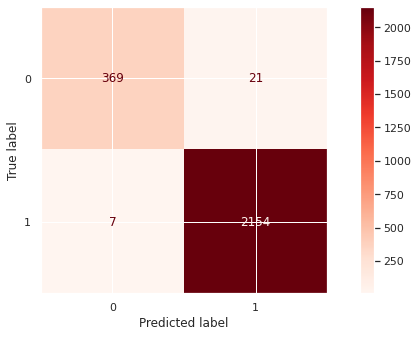

In [ ]:

# Decision Tree
DT = DecisionTreeClassifier(random_state=0)
DT.fit(X_train, y_train)
print(DT.score(X_test, y_test))
pred_DT = DT.predict(X_test)
print(classification_report(y_test, pred_DT))
# print(confusion_matrix(y_test, pred_DT)) # Way to go DT!!
plot_confusion_matrix(DT, X_test, y_test,cmap="Reds")
plt.show()

0.9890239121912975
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       390
           1       0.99      1.00      0.99      2161

    accuracy                           0.99      2551
   macro avg       0.99      0.97      0.98      2551
weighted avg       0.99      0.99      0.99      2551



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


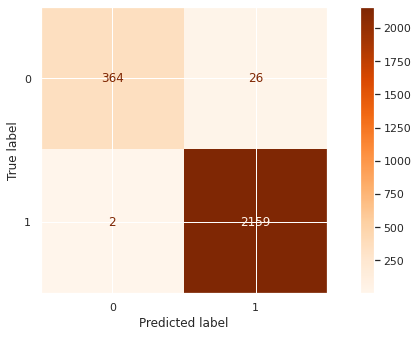

In [ ]:

# Gradient Boosting
GB = GradientBoostingClassifier(random_state=0)
GB.fit(X_train, y_train)
print(GB.score(X_test, y_test))
pred_GB = GB.predict(X_test)
print(classification_report(y_test, pred_GB))
# print(confusion_matrix(y_test, pred_GB))
plot_confusion_matrix(GB, X_test, y_test,cmap="Oranges")
plt.show()

0.9831438651509212
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       390
           1       0.98      1.00      0.99      2161

    accuracy                           0.98      2551
   macro avg       0.98      0.95      0.97      2551
weighted avg       0.98      0.98      0.98      2551

[[ 356   34]
 [   9 2152]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


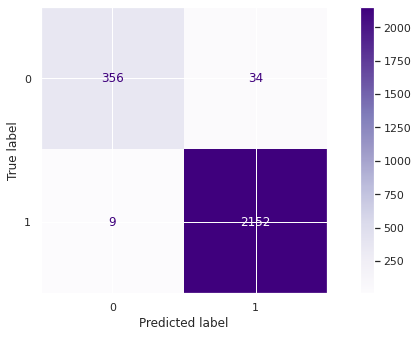

In [ ]:

# SVM
SV = SVC(kernel='linear', gamma=0.1, probability=1, random_state=0)
SV.fit(X_train_smote, y_train_smote)
print(SV.score(X_test, y_test))
pred_SV = SV.predict(X_test)
print(classification_report(y_test, pred_SV))
print(confusion_matrix(y_test, pred_SV))
plot_confusion_matrix(SV, X_test, y_test,cmap="Purples")
plt.show()

[0.96086106 0.95882353 0.96666667 0.94509804 0.94901961]
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       390
           1       0.98      1.00      0.99      2161

    accuracy                           0.98      2551
   macro avg       0.98      0.94      0.96      2551
weighted avg       0.98      0.98      0.98      2551



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


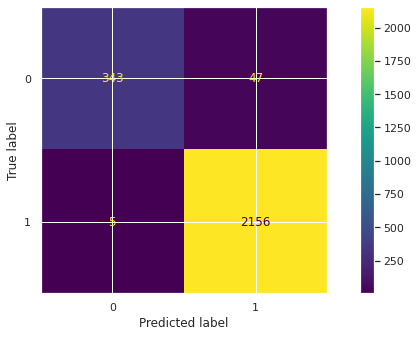

In [ ]:

# Voting Classifier (Ensemble ‚úä)

# Hard Voting
hard_vote = VotingClassifier(estimators=[('bnb', BNB), ('lr', LR), ('dt', DT), ('gb', GB), ('svm', SV)], voting='hard')
hard_vote.fit(X_train, y_train)
y_pred_hard = hard_vote.predict(X_test)
print(cross_val_score(hard_vote, X_test, y_test))
print(classification_report(y_test, y_pred_hard))
# print(confusion_matrix(y_test, y_pred_hard))
plot_confusion_matrix(hard_vote, X_test, y_test)
plt.show()

[0.97651663 0.98431373 0.97647059 0.98235294 0.96862745]
              precision    recall  f1-score   support

           0       0.99      0.92      0.96       390
           1       0.99      1.00      0.99      2161

    accuracy                           0.99      2551
   macro avg       0.99      0.96      0.98      2551
weighted avg       0.99      0.99      0.99      2551



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


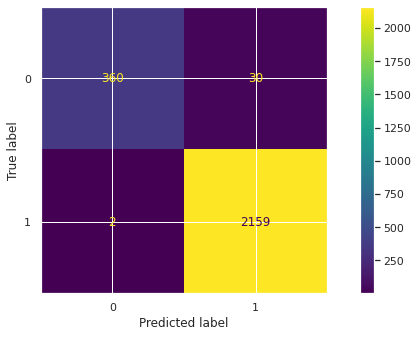

In [ ]:

# Soft Voting
soft_vote = VotingClassifier(estimators=[('bnb', BNB), ('lr', LR), ('dt', DT), ('gb', GB), ('svm', SV)], voting='soft')
soft_vote.fit(X_train, y_train)
soft_pred = soft_vote.predict(X_test)
print(cross_val_score(soft_vote, X_test, y_test)) # Clearly soft voting is better in this case than hard voting
print(classification_report(y_test, soft_pred))
# print(confusion_matrix(y_test, soft_pred))
plot_confusion_matrix(soft_vote, X_test, y_test)
plt.show()

In [ ]:

# ROC-AUC
from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [
               BernoulliNB(),
               LogisticRegression(random_state=0),
               DecisionTreeClassifier(random_state=0),
               GradientBoostingClassifier(random_state=0),
               SVC(kernel='linear', gamma=0.1, probability=1, random_state=0),
               VotingClassifier(estimators=[('bnb', BNB), ('lr', LR), ('dt', DT), ('gb', GB), ('svm', SV)], voting='soft')
               ]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)

    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

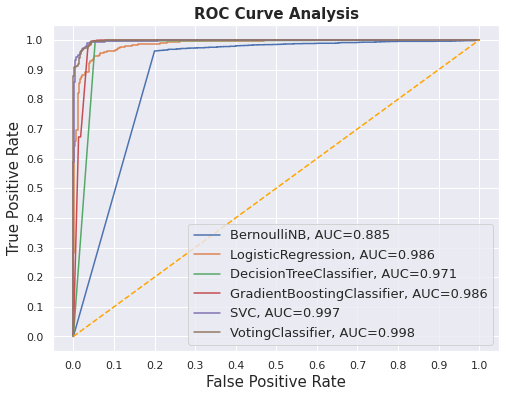

In [ ]:

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score
models = {}
accuracy, precision, recall = {}, {}, {}
models['Naive Bayes']=  BernoulliNB();
models['Logistic Regression']= LogisticRegression(random_state=0);
models['Decision Tree']=  DecisionTreeClassifier(random_state=0);
models['GB']=  GradientBoostingClassifier(random_state=0);
models['SVM']=  SVC(kernel='linear', gamma=0.1, probability=1, random_state=0);
models['Soft Voting']=  VotingClassifier(estimators=[('bnb', BNB), ('lr', LR), ('dt', DT), ('gb', GB), ('svm', SV)], voting='soft');

for key in models.keys():
    # Fit the classifier
    models[key].fit(X_train, y_train)

    # Make predictions
    predictions = models[key].predict(X_test)

    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

In [ ]:

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

Accuracy  Precision    Recall
Naive Bayes          0.925911   0.976863  0.938222
Logistic Regression  0.937672   0.996761  0.934085
Decision Tree        0.989024   0.996761  0.990345
GB                   0.989024   0.999075  0.988101
SVM                  0.976872   0.996761  0.976428
Soft Voting          0.987456   0.999075  0.986295

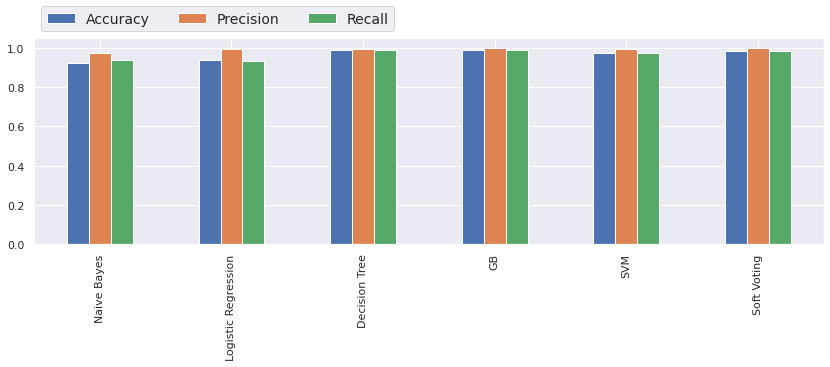

In [ ]:

ax = df_model.plot.bar()
ax.legend(
    ncol=len(models.keys()),
    bbox_to_anchor=(0, 1),
    loc='lower left',
    prop={'size': 14}
)
plt.tight_layout()

In [ ]:

# Prediction [0 for Fake, 1 for Real]
news = [
    'bengalbeats.com miscellaneous reporter unrelated ‡¶ú‡ßá‡¶≤‡ßá ‡¶ñ‡¶æ‡¶á ‡¶¨‡ßá‡¶π‡ßá‡¶∏‡ßç‡¶§‡¶ø ‡¶ñ‡¶æ‡¶®‡¶æ ‡¶ü‡ßç‡¶∞‡¶æ‡¶á‡¶¨‡ßÅ‡¶®‡¶æ‡¶≤‡ßá ‡¶Ø‡¶æ‡¶ì‡ßü‡¶æ ‡¶Æ‡¶æ‡¶®‡¶æ ‡¶®‡¶ø‡¶ú‡¶æ‡¶Æ‡ßÄ ‡¶¶‡ßà‡¶®‡¶ø‡¶ï ‡¶Æ‡¶§‡¶ø‡¶ï‡¶£‡ßç‡¶† ‡¶ï‡¶æ‡¶∞‡¶æ‡¶ó‡¶æ‡¶∞ ‡¶Æ‡¶§‡¶ø‡¶¨‡ßá‡¶¶‡¶ï‡¶¢‡¶æ‡¶ï‡¶æ ‡¶ï‡ßá‡¶®‡ßç‡¶¶‡ßç‡¶∞‡ßÄ‡ßü ‡¶ï‡¶æ‡¶∞‡¶æ‡¶ó‡¶æ‡¶∞‡ßá ‡¶â‡¶ö‡ßç‡¶ö ‡¶∞‡¶ï‡ßç‡¶§‡¶ö‡¶æ‡¶™‡ßá ‡¶Ü‡¶ï‡ßç‡¶∞‡¶æ‡¶®‡ßç‡¶§ ‡¶¨‡ßÉ‡¶π‡¶§‡ßç‡¶§‡¶∞ ‡¶ú‡¶æ‡¶Æ‡¶æ‡ßü‡¶æ‡¶§‡ßá ‡¶∏‡¶≤‡¶æ‡¶Æ‡ßÄ‡¶∞ ‡¶ñ‡¶æ‡¶®‡¶ï‡¶ø‡¶∞ ‡¶™‡ßã‡¶≤‡¶æ‡ßü‡ßá ‡¶Ü‡¶Æ‡ßÄ‡¶∞  ‡¶ï‡¶æ‡¶§‡ßç‡¶§‡¶∞‡ßá ‡¶Ü‡¶≤ ‡¶¨‡¶¶‡¶∞‡ßá‡¶∞ ‡¶ï‡¶Æ‡¶æ‡¶®‡ßç‡¶°‡¶æ‡¶∞ ‡¶Æ‡¶§‡¶ø‡¶â‡¶∞ ‡¶∞‡¶π‡¶Æ‡¶æ‡¶® ‡¶®‡¶ø‡¶ú‡¶æ‡¶Æ‡ßÄ ‡¶¨‡¶≤‡ßá‡¶õ‡ßá‡¶® ‡¶ú‡ßá‡¶≤‡ßá ‡¶ñ‡¶æ ‡¶¨‡ßá‡¶π‡ßá‡¶∏‡ßç‡¶§‡¶ø ‡¶ñ‡¶æ‡¶®‡¶æ ‡¶ü‡ßç‡¶∞‡¶æ‡¶¨‡ßÅ‡¶®‡¶æ‡¶≤‡ßá ‡¶§‡¶æ ‡¶Ø‡¶æ‡ßü‡¶æ ‡¶Æ‡¶æ‡¶®‡¶æ‡¶Æ‡¶Ç‡¶ó‡¶≤‡¶¨‡¶æ‡¶∞ ‡¶∏‡¶®‡ßç‡¶ß‡¶æ‡ßü ‡¶ï‡ßá‡¶®‡ßç‡¶¶‡ßç‡¶∞‡ßÄ‡ßü ‡¶ï‡¶æ‡¶∞‡¶æ‡¶ó‡¶æ‡¶∞‡ßá ‡¶Ü‡ßü‡¶ú‡¶ø‡¶§ ‡¶ï ‡¶∏‡¶Ç‡¶¨‡¶æ‡¶¶ ‡¶∏‡¶Æ‡ßç‡¶Æ‡ßá‡¶≤‡¶®‡ßá ‡¶Ü‡¶≤ ‡¶¨‡¶¶‡¶∞ ‡¶ï‡¶Æ‡¶æ‡¶®‡ßç‡¶°‡¶æ‡¶∞ ‡¶®‡¶ø‡¶ú‡¶æ‡¶Æ‡ßÄ  ‡¶ï‡¶•‡¶æ ‡¶¨‡¶≤‡ßá‡¶® ‡¶∏‡¶Æ‡ßü ‡¶§‡¶æ‡¶ï‡ßá ‡¶π‡¶æ‡¶∏‡ßç‡¶Ø‡¶ú‡ßç‡¶ú‡¶≤ ‡¶¶‡ßá‡¶ñ‡¶æ‡¶ö‡ßç‡¶õ‡¶ø‡¶≤‡¶∏‡¶Ç‡¶¨‡¶æ‡¶¶ ‡¶∏‡¶Æ‡ßç‡¶Æ‡ßá‡¶≤‡¶®‡ßá ‡¶®‡¶ø‡¶ú‡¶æ‡¶Æ‡ßÄ ‡¶¨‡¶≤‡ßá‡¶® ‡¶Ü‡¶Æ‡¶æ‡¶¶‡ßá‡¶∞ ‡¶ï‡¶æ‡¶∞‡¶æ‡¶ó‡¶æ‡¶∞‡¶ó‡ßÅ‡¶≤‡¶ø‡¶§‡ßá ‡¶ñ‡¶æ‡¶®‡¶æ‡¶™‡¶ø‡¶®‡¶æ‡¶∞ ‡¶¨‡ßá‡¶¨‡¶∏‡ßç‡¶•‡¶æ ‡¶Æ‡¶æ‡¶∂‡¶æ‡¶≤‡ßç‡¶≤‡¶æ‡¶π ‡¶´‡¶æ‡¶∂ ‡¶ï‡¶ø‡¶≤‡¶æ‡¶∂ ‡¶ï‡¶æ‡¶∂‡¶ø‡¶Æ‡¶™‡ßÅ‡¶∞ ‡¶ï‡¶æ‡¶∞‡¶æ‡¶ó‡¶æ‡¶∞‡ßá ‡¶∏‡¶ï‡¶æ‡¶≤‡ßá‡¶∞ ‡¶®‡¶æ‡¶∂‡¶§‡¶æ‡¶Ø‡¶º ‡¶Ü‡¶Æ‡¶æ‡¶Ø‡¶º ‡¶¶‡ßá‡ßü‡¶æ ‡¶π‡¶§ ‡¶≤‡¶æ‡¶≤ ‡¶Ü‡¶ü‡¶æ‡¶∞ ‡¶™‡¶æ‡¶Å‡¶ö‡¶ü‡¶ø ‡¶∞‡ßÅ‡¶ü‡¶ø ‡¶∏‡¶ô‡ßç‡¶ó‡ßá ‡¶°‡¶ø‡¶Æ ‡¶≠‡¶æ‡¶ú‡¶ø ‡¶Ü‡¶≤‡ßÅ ‡¶õ‡¶æ‡¶°‡¶º‡¶æ ‡¶∏‡¶¨‡¶ú‡¶ø ‡¶≠‡¶æ‡¶ú‡¶ø ‡¶Æ‡ßÅ‡¶∞‡¶ó‡¶ø‡¶∞ ‡¶Æ‡¶æ‡¶Ç‡¶∏ ‡¶Æ‡¶ø‡¶∑‡ßç‡¶ü‡¶ø ‡¶®‡¶∏‡¶ø‡¶∞ ‡¶¶‡ßÅ‡¶ß  ‡¶ï‡¶≤‡¶æ ‡¶®‡¶æ‡¶∂‡¶§‡¶æ ‡¶ñ‡¶æ‡ßü‡¶æ ‡¶π‡¶ú‡¶Æ ‡¶ï‡¶∞‡¶ø‡ßü‡¶æ ‡¶∏‡¶æ‡¶∞‡¶§‡¶æ‡¶∞‡¶ø ‡¶®‡¶æ ‡¶§‡¶æ‡¶∞ ‡¶Ü‡¶ó‡ßá ‡¶ö‡¶≤‡¶ø‡ßü‡¶æ ‡¶Ü‡¶∏‡¶ø‡¶§ ‡¶¶‡ßÅ‡¶™‡ßÅ‡¶∞‡ßá‡¶∞ ‡¶ñ‡¶æ‡¶¨‡¶æ‡¶∞‡ßá‡¶∞ ‡¶ö‡¶ø‡¶ï‡¶® ‡¶ö‡¶æ‡¶≤‡ßá‡¶∞ ‡¶≠‡¶æ‡¶§ ‡¶ï‡¶∞‡¶≤‡¶æ ‡¶≠‡¶æ‡¶ú‡¶ø ‡¶ü‡¶æ‡¶ï‡¶ø ‡¶¨‡¶æ ‡¶ö‡¶ø‡¶Ç‡¶°‡¶º‡¶ø ‡¶Æ‡¶æ‡¶õ ‡¶≠‡¶∞‡ßç‡¶§‡¶æ ‡¶¨‡ßá‡¶ó‡ßÅ‡¶® ‡¶≠‡¶æ‡¶ú‡¶ø ‡¶¨‡¶æ ‡¶≠‡¶∞‡ßç‡¶§‡¶æ ‡¶õ‡ßã‡¶ü ‡¶Æ‡¶æ‡¶õ ‡¶¨‡¶æ ‡¶ö‡¶ø‡¶Ç‡¶°‡¶º‡¶ø ‡¶Æ‡¶æ‡¶õ ‡¶≠‡ßÅ‡¶®‡¶æ ‡¶∏‡¶æ‡¶≤‡¶æ‡¶¶  ‡¶≤‡ßá‡¶¨‡ßÅ ‡¶Æ‡¶æ‡¶≤‡ßç‡¶ü‡¶æ ‡¶¨‡¶æ ‡¶¨‡¶∞ ‡¶¨‡¶æ ‡¶®‡¶æ‡¶∂‡¶™‡¶æ‡¶§‡¶ø ‡¶§‡¶æ‡¶∞‡¶™‡¶∞ ‡¶™‡ßá‡¶ü ‡¶≠‡¶∞‡¶ø‡ßü‡¶æ ‡¶ñ‡¶æ‡¶®‡¶æ‡¶¶‡¶æ‡¶®‡¶æ‡¶∞ ‡¶™‡¶∞ ‡¶¶‡¶ø‡¶§‡¶æ‡¶Æ ‡¶ò‡ßÅ‡¶Æ ‡¶ò‡ßÅ‡¶Æ ‡¶≠‡¶æ‡¶Ç‡¶ó‡¶ø‡¶Ø‡¶º‡¶æ ‡¶∏‡¶®‡ßç‡¶ß‡ßç‡¶Ø‡¶æ‡¶∞ ‡¶ñ‡¶æ‡¶¨‡¶æ‡¶∞‡ßá ‡¶ñ‡¶æ‡¶§‡¶æ‡¶Æ ‡¶≤‡¶æ‡¶°‡ßç‡¶°‡ßÅ ‡¶®‡¶ø‡¶Æ‡¶ï‡¶ø‡¶¨‡¶ø‡¶∏‡ßç‡¶ï‡ßÅ‡¶ü  ‡¶π‡¶∞‡¶≤‡¶ø‡¶ï‡¶∏ ‡¶¨‡¶æ ‡¶∏‡ßç‡¶Ø‡ßÅ‡¶™ ‡¶§‡¶æ‡¶∞‡¶™‡¶∞ ‡¶ï‡¶æ‡¶∞‡¶æ‡¶ó‡¶æ‡¶∞‡ßá ‡¶ï‡ßÅ‡¶® ‡¶ï‡¶ö‡¶ø ‡¶Æ‡ßã‡¶ú‡¶æ‡¶π‡¶ø‡¶¶‡ßá‡¶∞ ‡¶∏‡¶Ç‡¶ó‡ßá ‡¶®‡¶ø‡¶¨‡¶ø‡ßú ‡¶¨‡ßá‡ßü‡¶æ‡¶Æ ‡¶ï‡¶∞‡¶§‡¶æ‡¶Æ ‡¶ï‡¶ø‡¶õ‡ßÅ‡¶ï‡ßç‡¶∑‡¶® ‡¶∞‡¶æ‡¶§‡ßá‡¶∞ ‡¶ñ‡¶æ‡¶¨‡¶æ‡¶∞‡ßá ‡¶Ü‡¶∏‡¶ø‡¶§ ‡¶ö‡¶ø‡¶ï‡¶® ‡¶ö‡¶æ‡¶≤‡ßá‡¶∞ ‡¶≠‡¶æ‡¶§ ‡¶ï‡¶∞‡¶≤‡¶æ ‡¶≠‡¶æ‡¶ú‡¶ø ‡¶¨‡ßá‡¶ó‡ßÅ‡¶® ‡¶≠‡¶æ‡¶ú‡¶ø ‡¶¨‡¶æ ‡¶≠‡¶∞‡ßç‡¶§‡¶æ ‡¶¢‡ßá‡¶°‡¶º‡¶∂ ‡¶¨‡¶æ ‡¶Æ‡¶ø‡¶∑‡ßç‡¶ü‡¶ø‡¶ï‡ßÅ‡¶Æ‡¶°‡¶º‡¶æ ‡¶¨‡¶æ ‡¶™‡ßá‡¶Å‡¶™‡ßá ‡¶≠‡¶æ‡¶ú‡¶ø ‡¶ó‡¶∞‡ßÅ ‡¶¨‡¶æ ‡¶ñ‡¶æ‡¶∏‡¶ø‡¶∞ ‡¶Æ‡¶æ‡¶Ç‡¶∏ ‡¶≠‡ßÅ‡¶®‡¶æ ‡¶∏‡¶æ‡¶≤‡¶æ‡¶¶  ‡¶≤‡ßá‡¶¨‡ßÅ ‡¶¨‡¶Ç ‡¶ï‡¶Æ‡¶≤‡¶æ ‡¶Æ‡¶æ‡¶≤‡ßç‡¶ü‡¶æ ‡¶®‡¶æ‡¶∂‡¶™‡¶æ‡¶§‡¶ø ‡¶Ü‡¶ô‡ßÅ‡¶∞ ‡¶¨‡¶æ ‡¶¨‡¶∞‡¶Ü‡¶¨‡ßá‡¶ó‡¶ò‡¶® ‡¶ï‡¶£‡ßç‡¶†‡ßá ‡¶®‡¶ø‡¶ú‡¶æ‡¶Æ‡ßÄ ‡¶¨‡¶≤‡ßá‡¶® ‡¶Ü‡¶Æ‡¶ø ‡¶ú‡¶æ‡¶®‡¶ø ‡¶¨‡ßá‡¶π‡ßá‡¶∏‡ßç‡¶§‡ßá ‡¶Ø‡¶æ‡ßü‡¶æ‡¶∞ ‡¶ï‡ßÅ‡¶® ‡¶∏‡ßÅ‡¶Ø‡ßÅ‡¶ó ‡¶Ü‡¶Æ‡¶æ‡¶∞ ‡¶®‡¶æ ‡¶Ü‡¶Æ‡¶æ‡¶∞ ‡¶¨‡¶ø‡¶™‡¶¶ ‡¶´‡¶æ‡¶Å‡¶∏‡¶ø‡¶∞ ‡¶™‡¶∞ ‡¶ï‡¶¨‡¶∞‡ßá ‡¶Ü‡¶Ø‡¶æ‡¶¨ ‡¶¶‡¶ø‡ßü‡¶æ ‡¶∂‡ßÅ‡¶∞‡ßÅ ‡¶π‡¶¨‡ßá ‡¶¶‡ßã‡¶ú‡¶ñ‡ßá‡¶∞ ‡¶Ü‡¶ó‡ßÅ‡¶®‡ßá ‡¶ú‡ßç‡¶¨‡¶≤‡¶ø‡ßü‡¶æ ‡¶™‡ßÅ‡ßú‡¶ø‡ßü‡¶æ ‡¶Ü‡¶ñ‡ßá‡¶∞‡¶æ‡¶§‡ßá ‡¶ó‡¶ø‡ßü‡¶æ ‡¶∂‡ßá‡¶∑ ‡¶π‡¶¨‡ßá  ‡¶∏‡ßÅ‡¶¶‡¶ø‡¶∞‡ßç‡¶ò ‡¶ú‡ßÄ‡¶¨‡¶®‡ßá ‡¶ï‡¶æ‡¶∞‡¶æ‡¶ó‡¶æ‡¶∞‡ßá ‡¶ï‡¶æ‡¶ü‡¶æ‡¶® ‡¶¨‡¶§‡¶∏‡¶∞‡¶ó‡ßÅ‡¶≤‡ßÅ ‡¶Ü‡¶Æ‡¶æ‡¶∞ ‡¶ú‡ßÄ‡¶¨‡¶®‡ßá‡¶∞ ‡¶∂‡ßç‡¶∞‡ßá‡¶∑‡ßç‡¶† ‡¶∏‡¶Æ‡ßü  ‡¶Ø‡ßá‡¶® ‡¶¶‡ßÅ‡¶®‡¶ø‡ßü‡¶æ‡¶∞ ‡¶¨‡ßÅ‡¶ï‡ßá ‡¶ï ‡¶ü‡ßÅ‡¶ï‡¶∞‡ßÅ ‡¶∂‡¶æ‡¶¶‡ßç‡¶¶‡¶æ‡¶¶‡ßá‡¶∞ ‡¶¨‡ßá‡¶π‡ßá‡¶∏‡ßç‡¶§ ‡¶ñ‡¶æ‡ßü‡¶æ ‡¶∂‡ßã‡ßü‡¶æ‡¶∞ ‡¶Ö‡¶™‡ßÅ‡¶∞‡ßç‡¶¨ ‡¶¨‡¶®‡ßç‡¶¶‡¶¨‡¶∏‡ßç‡¶§‡¶π‡¶æ‡¶∏‡¶§‡ßá ‡¶π‡¶æ‡¶∏‡¶§‡ßá ‡¶®‡¶ø‡¶ú‡¶æ‡¶Æ‡ßÄ ‡¶¨‡¶≤‡ßá‡¶® ‡¶∞‡ßÅ‡¶™ ‡¶ñ‡¶æ‡¶®‡¶æ‡¶™‡¶ø‡¶®‡¶æ ‡¶ï‡¶∞‡¶≤‡ßá ‡¶∞‡¶ï‡ßç‡¶§‡¶ö‡¶æ‡¶™ ‡¶¨‡ßÉ‡¶¶‡ßç‡¶¶‡¶ø ‡¶™‡¶æ‡ßü‡¶æ ‡¶∏‡ßç‡¶¨‡¶æ‡¶≠‡¶æ‡¶¨‡¶ø‡¶ï ‡¶§‡¶æ ‡¶Ü‡¶ú ‡¶∏‡¶ï‡¶æ‡¶≤‡ßá ‡¶°‡¶æ‡¶ï‡ßç‡¶§‡¶æ‡¶∞‡¶ï‡ßá ‡¶°‡¶æ‡¶ï‡¶ø‡ßü‡¶æ ‡¶¨‡¶≤‡¶≤‡¶æ‡¶Æ ‡¶°‡¶æ‡¶ï‡ßç‡¶§‡¶æ‡¶∞ ‡¶°‡¶æ‡¶ï‡ßç‡¶§‡¶æ‡¶∞ ‡¶∂‡ßÅ‡¶® ‡¶®‡¶æ ‡¶§ ‡¶¨‡ßá‡¶∂‡ßÄ ‡¶≠‡¶æ‡¶§ ‡¶ñ‡¶æ‡ßü‡¶æ ‡¶≠‡¶æ‡¶≤ ‡¶®‡¶æ ‡¶°‡¶æ‡¶ï‡ßç‡¶§‡¶æ‡¶∞ ‡¶Ü‡¶∏‡¶ø‡ßü‡¶æ ‡¶Ü‡¶Æ‡¶æ‡ßü ‡¶ï‡¶ø‡¶õ‡ßÅ‡¶ï‡ßç‡¶∑‡¶® ‡¶ü‡¶ø‡¶™‡¶ø‡ßü‡¶æ ‡¶ü‡ßÅ‡¶™‡¶ø‡ßü‡¶æ ‡¶ö‡¶≤‡¶ø‡ßü‡¶æ ‡¶ó‡ßá‡¶≤ ‡¶ï‡¶æ‡¶∞‡¶æ‡¶ó‡¶æ‡¶∞‡ßá‡¶∞ ‡¶®‡¶æ‡ßü‡ßá‡¶¨‡ßá ‡¶Ü‡¶Æ‡ßÄ‡¶∞ ‡¶´‡¶∞‡¶Æ‡¶æ‡¶® ‡¶Ü‡¶≤‡ßÄ ‡¶õ‡¶æ‡¶∞ ‡¶Ü‡¶∏‡¶ø‡ßü‡¶æ ‡¶Ü‡¶Æ‡¶æ‡ßü ‡¶¨‡¶≤‡¶≤‡ßá‡¶® ‡¶®‡¶ø‡¶ú‡¶æ‡¶Æ‡ßÄ ‡¶∏‡¶æ‡¶¨ ‡¶Ü‡¶ú‡¶ï‡ßá‡¶∞ ‡¶¶‡¶ø‡¶®‡¶ü‡¶æ ‡¶∞‡ßá‡¶∑‡ßç‡¶ü‡ßá ‡¶•‡¶æ‡¶ï‡ßá‡¶® ‡¶ü‡ßç‡¶∞‡¶æ‡¶¨‡ßÅ‡¶®‡¶æ‡¶≤‡ßá ‡¶ó‡¶ø‡ßü‡¶æ ‡¶ï‡¶æ‡¶Æ ‡¶®‡¶æ‡¶Ö‡¶∂‡ßç‡¶∞‡ßÅ ‡¶Æ‡ßÅ‡¶õ‡ßá ‡¶®‡¶ø‡¶ú‡¶æ‡¶Æ‡ßÄ ‡¶¨‡¶≤‡ßá‡¶® ‡¶ï‡¶æ‡¶∞‡¶æ‡¶ó‡¶æ‡¶∞‡ßá‡¶∞ ‡¶®‡¶æ‡ßü‡ßá‡¶¨ ‡¶´‡¶∞‡¶Æ‡¶æ‡¶® ‡¶Ü‡¶≤‡ßÄ ‡¶õ‡¶æ‡¶∞‡ßá‡¶∞ ‡¶Æ‡¶§ ‡¶≠‡¶æ‡¶≤ ‡¶¨‡ßá‡¶ï‡ßç‡¶§‡¶ø ‡¶¶‡¶æ‡¶®‡ßÄ‡¶Ç ‡¶Ü‡¶∞ ‡¶¶‡ßá‡¶ñ‡¶æ ‡¶Ø‡¶æ‡ßü ‡¶®‡¶æ ‡¶ï‡¶æ‡¶§‡ßç‡¶§‡¶∞ ‡¶∏‡¶æ‡¶≤‡ßá ‡¶Ü‡¶∞‡ßá‡¶ï ‡¶´‡¶∞‡¶Æ‡¶æ‡¶® ‡¶Ü‡¶≤‡ßÄ‡¶∞ ‡¶Ü‡¶®‡ßç‡¶°‡¶æ‡¶∞‡ßá ‡¶ï‡¶ø‡¶õ‡ßÅ‡¶¶‡¶ø‡¶® ‡¶ï‡¶æ‡¶Æ ‡¶ï‡¶∞‡¶æ‡¶∞ ‡¶Ö‡¶≠‡¶ø‡¶ú‡ßç‡¶û‡¶§‡¶æ ‡¶π‡¶õ‡¶ø‡¶≤ ‡¶∏‡ßá ‡¶´‡¶∞‡¶Æ‡¶æ‡¶® ‡¶Ü‡¶≤‡ßÄ‡¶∞ ‡¶™‡¶∞ ‡¶ö‡¶æ‡¶∞‡¶ü‡¶ø ‡¶¶‡¶∂‡¶ï ‡¶ï‡¶æ‡¶ü‡¶ø‡ßü‡¶æ ‡¶ó‡ßá‡¶≤ ‡¶§‡¶æ‡¶∞‡¶™‡¶∞ ‡¶™‡¶æ‡¶≤‡¶æ‡¶Æ  ‡¶´‡¶∞‡¶Æ‡¶æ‡¶® ‡¶Ü‡¶≤‡ßÄ‡¶∞‡ßá ‡¶§‡¶æ‡¶∞ ‡¶®‡¶æ‡¶Æ ‡¶∂‡ßÅ‡¶®‡¶ø‡ßü‡¶æ ‡¶Ü‡¶Æ‡¶æ‡¶∞ ‡¶∞‡¶ï‡ßç‡¶§‡¶ö‡¶æ‡¶™ ‡¶¶‡ßá‡ßú ‡¶™‡ßá‡¶∏‡¶ï‡ßá‡¶≤ ‡¶ï‡¶Æ‡¶ø‡ßü‡¶æ ‡¶ó‡¶ø‡ßü‡¶æ‡¶õ‡ßá‡¶Ö‡¶ö‡¶ø‡¶∞‡ßá ‡¶∏‡ßÅ‡¶∏‡ßç‡¶• ‡¶π‡ßü‡ßá ‡¶ü‡ßç‡¶∞‡¶æ‡¶¨‡ßÅ‡¶®‡¶æ‡¶≤‡ßá‡¶∞ ‡¶∞‡¶æ‡ßü ‡¶∂‡ßç‡¶∞‡¶¨‡¶®‡ßá‡¶∞ ‡¶ö‡ßç‡¶õ‡¶æ ‡¶¨‡ßá‡¶ï‡ßç‡¶§ ‡¶ï‡¶∞‡ßá ‡¶®‡¶ø‡¶ú‡¶æ‡¶Æ‡ßÄ ‡¶¨‡¶≤‡ßá‡¶® ‡¶∂‡ßÅ‡¶®‡¶ø‡¶≤‡¶æ‡¶Æ ‡¶∏‡¶≤‡¶æ‡¶Æ‡ßÄ ‡¶õ‡¶æ‡¶§‡ßç‡¶∞ ‡¶∏‡¶Ç‡¶∏‡ßç‡¶•‡¶æ‡¶∞ ‡ß®‡ß™‡¶ü‡¶ø ‡¶Ø‡ßÅ‡¶¨‡¶§‡ßÄ ‡¶´‡¶ø‡¶™‡¶ü‡¶ø ‡¶∂‡ßá‡¶°‡¶∏ ‡¶Ö‡¶´ ‡¶ó‡ßç‡¶∞‡ßá ‡¶∏‡¶π ‡¶ß‡¶∞‡¶æ ‡¶™‡ßú‡¶ø‡ßü‡¶æ‡¶õ‡ßá ‡¶â‡¶π‡¶æ‡¶¶‡ßá‡¶∞ ‡¶Ü‡¶Æ‡¶æ‡¶∞ ‡¶ï‡¶æ‡¶∞‡¶æ‡¶ï‡¶ï‡ßç‡¶∑‡ßá ‡¶™‡¶æ‡¶†‡¶æ‡¶® ‡¶π‡¶≤‡ßá ‡¶∂‡¶æ‡¶¶‡ßç‡¶¶‡¶æ‡¶¶‡ßá‡¶∞ ‡¶¨‡ßá‡¶π‡ßá‡¶∏‡ßç‡¶§ ‡¶¶‡ßá‡¶ñ‡¶æ ‡¶∑‡ßÅ‡¶≤ ‡¶Ü‡¶®‡¶æ ‡¶™‡ßÅ‡¶∞‡¶® ‡¶π‡¶§',
    'motichurladdoo.com national reporter unrelated ‡¶è‡¶¨‡¶æ‡¶∞ ‡¶Æ‡¶∂‡¶æ‡¶∞ ‡¶¨‡¶ø‡¶∞‡ßÅ‡¶¶‡ßç‡¶ß‡ßá ‡¶ó‡¶∞‡ßç‡¶ú‡ßá ‡¶â‡¶†‡¶≤‡ßã ‡¶õ‡¶æ‡¶§‡ßç‡¶∞‡¶≤‡ßÄ‡¶ó‡ßá‡¶∞ ‡¶ï‡¶æ‡¶Æ‡¶æ‡¶® ‡¶∏‡¶Æ‡ßç‡¶™‡ßç‡¶∞‡¶§‡¶ø ‡¶¢‡¶æ‡¶ï‡¶æ ‡¶¨‡¶ø‡¶∂‡ßç‡¶¨‡¶¨‡¶ø‡¶¶‡ßç‡¶Ø‡¶æ‡¶≤‡ßü ‡¶™‡ßç‡¶∞‡¶æ‡¶ô‡ßç‡¶ó‡¶£‡ßá ‡¶õ‡¶æ‡¶§‡ßç‡¶∞‡¶≤‡ßÄ‡¶ó‡ßá‡¶∞ ‡¶ï‡¶ü‡¶ø ‡¶Ö‡¶Ç‡¶∂‡¶ï‡ßá ‡¶Æ‡¶∂‡¶æ ‡¶Æ‡¶æ‡¶∞‡¶æ‡¶∞ ‡¶Ø‡¶®‡ßç‡¶§‡ßç‡¶∞ ‡¶®‡¶ø‡ßü‡ßá ‡¶ò‡ßÅ‡¶∞‡ßá ‡¶ò‡ßÅ‡¶∞‡ßá ‡¶Æ‡¶∂‡¶æ ‡¶Æ‡¶æ‡¶∞‡¶§‡ßá ‡¶¶‡ßá‡¶ñ‡¶æ ‡¶Ø‡¶æ‡ßü ‡¶¨‡¶ø‡¶∏‡ßç‡¶§‡¶æ‡¶∞‡¶ø‡¶§ ‡¶ñ‡ßã‡¶Å‡¶ú ‡¶ï‡¶∞‡¶§‡ßá ‡¶ó‡ßá‡¶≤‡ßá ‡¶ú‡¶æ‡¶®‡¶æ ‡¶Ø‡¶æ‡ßü ‡¶õ‡¶æ‡¶§‡ßç‡¶∞‡¶≤‡ßÄ‡¶ó‡ßá‡¶∞ ‡¶∏‡¶æ‡¶ß‡¶æ‡¶∞‡¶£ ‡¶∏‡¶Æ‡ßç‡¶™‡¶æ‡¶¶‡¶ï ‡¶ó‡ßã‡¶≤‡¶æ‡¶Æ ‡¶∞‡¶æ‡¶¨‡ßç‡¶¨‡¶æ‡¶®‡ßÄ ‡¶°‡ßá‡¶ô‡ßç‡¶ó‡ßÅ ‡¶ú‡ßç‡¶¨‡¶∞‡ßá ‡¶Ü‡¶ï‡ßç‡¶∞‡¶æ‡¶®‡ßç‡¶§ ‡¶π‡¶¨‡¶æ‡¶∞ ‡¶™‡¶∞ ‡¶¢‡¶æ‡¶¨‡¶ø ‡¶ï‡ßç‡¶Ø‡¶æ‡¶Æ‡ßç‡¶™‡¶æ‡¶∏‡ßá ‡¶Æ‡¶∂‡¶æ ‡¶®‡¶ø‡¶ß‡¶® ‡¶ï‡¶∞‡ßç‡¶Æ‡¶∏‡ßÇ‡¶ö‡¶ø ‡¶®‡¶ø‡ßü‡ßá‡¶õ‡ßá ‡¶∏‡¶Ç‡¶ó‡¶†‡¶®‡¶ü‡¶ø‡¶∞ ‡¶®‡ßá‡¶§‡¶æ‡¶ï‡¶∞‡ßç‡¶Æ‡ßÄ‡¶∞‡¶æ‡¶ó‡¶§‡¶ï‡¶æ‡¶≤ ‡ß®‡ß™ ‡¶®‡¶≠‡ßá‡¶Æ‡ßç‡¶¨‡¶∞ ‡¶∏‡¶®‡ßç‡¶ß‡ßç‡¶Ø‡¶æ‡ßü ‡¶õ‡¶æ‡¶§‡ßç‡¶∞‡¶≤‡ßÄ‡¶ó‡ßá‡¶∞ ‡¶∏‡¶≠‡¶æ‡¶™‡¶§‡¶ø ‡¶∏‡¶û‡ßç‡¶ú‡¶ø‡¶§ ‡¶ö‡¶®‡ßç‡¶¶‡ßç‡¶∞ ‡¶¶‡¶æ‡¶∏‡ßá‡¶∞ ‡¶®‡ßá‡¶§‡ßÉ‡¶§‡ßç‡¶¨‡ßá ‡¶Æ‡¶ß‡ßÅ‡¶∞ ‡¶ï‡ßç‡¶Ø‡¶æ‡¶®‡ßç‡¶ü‡¶ø‡¶® ‡¶•‡ßá‡¶ï‡ßá  ‡¶Æ‡¶∂‡¶æ ‡¶®‡¶ø‡¶ß‡¶® ‡¶Ö‡¶≠‡¶ø‡¶Ø‡¶æ‡¶® ‡¶∂‡ßÅ‡¶∞‡ßÅ ‡¶π‡ßü ‡¶ï‡ßç‡¶Ø‡¶æ‡¶Æ‡ßç‡¶™‡¶æ‡¶∏‡ßá‡¶∞ ‡¶¨‡¶ø‡¶≠‡¶ø‡¶®‡ßç‡¶® ‡¶ó‡ßÅ‡¶∞‡ßÅ‡¶§‡ßç‡¶¨‡¶™‡ßÇ‡¶∞‡ßç‡¶£ ‡¶∏‡ßç‡¶•‡¶æ‡¶® ‡¶¨‡¶Ç ‡¶π‡¶≤‡¶ó‡ßÅ‡¶≤‡ßã‡¶∞ ‡¶Ü‡¶∂‡ßá‡¶™‡¶æ‡¶∂‡ßá ‡¶Æ‡¶∂‡¶æ ‡¶Æ‡¶æ‡¶∞‡¶æ‡¶∞ ‡¶∑‡ßÅ‡¶ß ‡¶¶‡ßá‡¶® ‡¶§‡¶æ‡¶∞‡¶æ ‡¶¨‡ßç‡¶Ø‡¶æ‡¶™‡¶æ‡¶∞‡ßá ‡¶∏‡¶Ç‡¶ó‡¶†‡¶®‡¶ü‡¶ø‡¶∞ ‡¶ï‡¶ú‡¶® ‡¶ï‡¶∞‡ßç‡¶Æ‡ßÄ‡¶∞ ‡¶ï‡¶æ‡¶õ‡ßá ‡¶ú‡¶æ‡¶®‡¶§‡ßá ‡¶ö‡¶æ‡ßü‡¶æ ‡¶π‡¶≤‡ßá ‡¶§‡¶ø‡¶®‡¶ø ‡¶Æ‡¶∂‡¶æ ‡¶Æ‡¶æ‡¶∞‡¶§‡ßá ‡¶¨‡ßç‡¶Ø‡¶∏‡ßç‡¶§ ‡¶Ü‡¶õ‡ßá‡¶® ‡¶¨‡¶≤‡ßá ‡¶ú‡¶æ‡¶®‡¶æ‡¶® ‡¶™‡¶æ‡¶∂‡ßá ‡¶•‡¶æ‡¶ï‡¶æ ‡¶§‡¶æ‡¶∞ ‡¶ï‡¶ú‡¶® ‡¶∏‡¶π‡¶Æ‡¶§ ‡¶≠‡¶æ ‡¶Ü‡¶Æ‡¶æ‡¶¶‡ßá‡¶∞ ‡¶¨‡¶≤‡ßá‡¶® ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶¶‡ßá‡¶∂‡ßá ‡¶Æ‡¶∂‡¶æ‡¶∞ ‡¶ï‡ßã‡¶® ‡¶∏‡ßç‡¶•‡¶æ‡¶® ‡¶®‡ßá ‡¶Æ‡¶∂‡¶æ ‡¶Æ‡¶® ‡¶ï‡¶ü‡¶æ ‡¶™‡¶§‡¶ô‡ßç‡¶ó ‡¶Ø‡¶æ‡¶ï‡ßá ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶∞ ‡¶Æ‡¶æ‡¶®‡ßÅ‡¶∑ ‡¶ö‡¶æ‡ßü ‡¶®‡¶æ ‡¶Ü‡¶Æ‡¶∞‡¶æ ‡¶Ö‡¶®‡ßá‡¶ï ‡¶Ü‡¶ó‡ßá ‡¶•‡ßá‡¶ï‡ßá  ‡¶ï‡¶∞‡ßç‡¶Æ‡¶∏‡ßÇ‡¶ö‡¶ø ‡¶®‡ßá‡¶¨‡¶æ‡¶∞ ‡¶ï‡¶•‡¶æ ‡¶ö‡¶ø‡¶®‡ßç‡¶§‡¶æ ‡¶ï‡¶∞‡¶õ‡¶ø‡¶≤‡¶æ‡¶Æ ‡¶ï‡¶ø‡¶®‡ßç‡¶§‡ßÅ ‡¶¨‡¶ø‡¶≠‡¶ø‡¶®‡ßç‡¶® ‡¶®‡¶ø‡¶∞‡ßç‡¶¨‡¶æ‡¶ö‡¶®‡ßÄ ‡¶¨‡ßç‡¶Ø‡¶∏‡ßç‡¶§‡¶§‡¶æ‡ßü ‡¶ï‡¶∞‡¶æ ‡¶π‡ßü‡ßá ‡¶†‡ßá‡¶®‡¶ø ‡¶§‡¶¨‡ßá ‡¶¨‡¶æ‡¶∞ ‡¶ó‡ßã‡¶≤‡¶æ‡¶Æ ‡¶∞‡¶æ‡¶¨‡ßç‡¶¨‡¶æ‡¶®‡ßÄ ‡¶≠‡¶æ‡ßü‡ßá‡¶∞ ‡¶Ö‡¶∏‡ßÅ‡¶∏‡ßç‡¶•‡¶§‡¶æ‡¶∞ ‡¶™‡¶∞ ‡¶Ü‡¶Æ‡¶∞‡¶æ ‡¶Ü‡¶∞ ‡¶¨‡¶∏‡ßá ‡¶•‡¶æ‡¶ï‡¶§‡ßá ‡¶™‡¶æ‡¶∞‡¶≤‡¶æ‡¶Æ ‡¶®‡¶æ‡¶∏‡¶π‡¶Æ‡¶§ ‡¶≠‡¶æ‡¶ü‡¶ø ‡¶Ü‡¶∞ ‡¶ú‡¶æ‡¶®‡¶æ‡¶® ‡¶ï‡¶•‡¶æ‡ßü ‡¶Ü‡¶õ‡ßá ‡¶Æ‡¶∂‡¶æ ‡¶Æ‡¶æ‡¶∞‡¶§‡ßá ‡¶ï‡¶æ‡¶Æ‡¶æ‡¶® ‡¶≤‡¶æ‡¶ó‡ßá ‡¶∏‡¶ø‡¶ü‡¶ø ‡¶ï‡¶∞‡ßç‡¶™‡ßã‡¶∞‡ßá‡¶∂‡¶® ‡¶Ø‡ßá ‡¶§‡ßã‡¶¶‡¶ø‡¶® ‡¶ß‡¶∞‡ßá ‡¶Æ‡¶∂‡¶æ ‡¶¶‡¶Æ‡¶® ‡¶ï‡¶∞‡ßç‡¶Æ‡¶∏‡ßÇ‡¶ö‡¶ø ‡¶™‡¶æ‡¶≤‡¶® ‡¶ï‡¶∞‡ßá ‡¶Ü‡¶∏‡¶≤‡ßã ‡¶ï‡¶ø‡¶®‡ßç‡¶§‡ßÅ ‡¶§‡¶æ‡¶§‡ßá ‡¶ï‡ßã‡¶® ‡¶≤‡¶æ‡¶≠ ‡¶®‡¶æ ‡¶π‡ßü‡¶æ‡¶§‡ßá ‡¶¨‡¶æ‡¶ß‡ßç‡¶Ø ‡¶π‡ßü‡ßá ‡¶Ü‡¶Æ‡¶æ‡¶¶‡ßá‡¶∞ ‡¶®‡¶ø‡¶ú‡¶∏‡ßç‡¶¨ ‡¶∏‡ßç‡¶™‡ßá‡¶∂‡¶æ‡¶≤ ‡¶ï‡¶æ‡¶Æ‡¶æ‡¶® ‡¶¶‡¶ø‡ßü‡ßá  ‡¶¶‡¶Æ‡¶® ‡¶ï‡¶∞‡ßç‡¶Æ‡¶∏‡ßÇ‡¶ö‡¶ø ‡¶∂‡ßÅ‡¶∞‡ßÅ ‡¶ï‡¶∞‡¶æ ‡¶π‡ßü‡ßá‡¶õ‡ßá‡¶Ü‡¶∞‡ßá‡¶ï‡¶ú‡¶® ‡¶∏‡¶π‡¶Æ‡¶§ ‡¶≠‡¶æ ‡¶ú‡¶æ‡¶®‡¶æ‡¶® ‡¶Ü‡¶∞‡ßã ‡¶ï‡¶ü‡¶ø ‡¶ö‡¶æ‡¶û‡ßç‡¶ö‡¶≤‡ßç‡¶Ø‡¶ï‡¶∞ ‡¶§‡¶•‡ßç‡¶Ø  ‡¶¶‡¶Æ‡¶® ‡¶Ö‡¶≠‡¶ø‡¶Ø‡¶æ‡¶®‡¶ï‡ßá ‡¶∏‡¶´‡¶≤ ‡¶ï‡¶∞‡¶æ‡¶∞ ‡¶ú‡¶®‡ßç‡¶Ø‡ßá ‡¶õ‡¶æ‡¶§‡ßç‡¶∞‡¶≤‡ßÄ‡¶ó ‡¶ï‡¶ü‡¶ø ‡¶Ü‡¶≤‡¶æ‡¶¶‡¶æ ‡¶∏‡¶Ç‡¶ó‡¶†‡¶® ‡¶ñ‡ßã‡¶≤‡¶æ‡¶∞ ‡¶ï‡¶•‡¶æ ‡¶ö‡¶ø‡¶®‡ßç‡¶§‡¶æ ‡¶ï‡¶∞‡¶õ‡ßá ‡¶∏‡¶Ç‡¶ó‡¶†‡¶®‡¶ü‡¶ø‡¶∞ ‡¶®‡¶æ‡¶Æ ‡¶π‡¶¨‡ßá ‡¶Æ‡¶∂‡¶ï‡ßÄ ‡¶¶‡¶Æ‡¶® ‡¶¶‡¶™‡ßç‡¶§‡¶∞ ‡¶∞‡¶´‡ßá ‡¶Æ‡¶¶‡¶¶ ‡¶§‡¶ø‡¶®‡¶ø ‡¶â‡¶ö‡ßç‡¶õ‡ßç‡¶¨‡¶∏‡¶ø‡¶§ ‡¶π‡ßü‡ßá ‡¶Ü‡¶∞‡ßã ‡¶¨‡¶≤‡ßá‡¶® ‡¶¨‡¶ø‡¶∞‡ßã‡¶ß‡ßÄ ‡¶¶‡¶≤ ‡¶¨‡¶æ‡¶∞‡¶¨‡¶æ‡¶∞ ‡¶Ü‡¶Æ‡¶æ‡¶¶‡ßá‡¶∞‡¶ï‡ßá ‡¶Æ‡¶¶‡¶¶‡¶™‡ßÅ‡¶∑‡ßç‡¶ü ‡¶¶‡¶≤ ‡¶π‡¶ø‡¶∏‡ßá‡¶¨‡ßá ‡¶Ü‡¶ñ‡ßç‡¶Ø‡¶æ ‡¶¶‡¶ø‡ßü‡ßá ‡¶∏‡ßá‡¶õ‡ßá ‡¶®‡¶æ ‡¶ó‡ßá‡¶∏ ‡¶π‡ßã‡ßü‡¶æ‡¶ü ‡¶Ü‡¶Æ‡¶∞‡¶æ ‡¶ñ‡¶® ‡¶Ü‡¶∏‡¶≤‡ßá ‡¶Æ‡¶¶‡¶¶‡ßü‡¶æ‡¶≤‡¶æ ‡¶ï‡¶ü‡¶æ ‡¶¶‡¶≤ ‡¶π‡¶ø‡¶∏‡ßá‡¶¨‡ßá ‡¶Ü‡¶§‡ßç‡¶Æ‡¶™‡ßç‡¶∞‡¶ï‡¶æ‡¶∂ ‡¶ï‡¶∞‡¶§‡ßá ‡¶ö‡¶≤‡ßá‡¶õ‡¶ø ‡¶™‡¶∞‡ßç‡¶Ø‡¶æ‡ßü‡ßá ‡¶®‡¶ø‡¶ú‡ßá‡¶∞ ‡¶ó‡¶æ‡¶≤‡ßá ‡¶¨‡¶∏‡¶æ ‡¶ï‡¶ü‡¶ø ‡¶Æ‡¶∂‡¶æ‡¶ï‡ßá ‡¶Æ‡¶æ‡¶∞‡¶§‡ßá ‡¶ó‡¶ø‡ßü‡ßá ‡¶§‡¶ø‡¶®‡¶ø ‡¶ï‡¶ø‡¶û‡ßç‡¶ö‡¶ø‡¶§ ‡¶Ü‡¶ò‡¶æ‡¶§‡¶™‡ßç‡¶∞‡¶æ‡¶™‡ßç‡¶§ ‡¶π‡¶® ‡¶ï‡¶ü‡ßÅ ‡¶∏‡¶æ‡¶Æ‡¶≤‡ßá ‡¶®‡¶ø‡ßü‡ßá ‡¶§‡¶ø‡¶®‡¶ø ‡¶Ø‡ßã‡¶ó ‡¶ï‡¶∞‡ßá‡¶® ‡¶Ü‡¶Æ‡¶∞‡¶æ ‡¶∏‡¶¨‡¶æ‡¶ï‡ßá ‡¶ï‡¶ü‡¶æ ‡¶Æ‡ßá‡¶∏‡ßá‡¶ú ‡¶¶‡¶ø‡¶§‡ßá ‡¶ö‡¶æ ‡¶Ø‡ßá ‡¶∏‡¶ï‡¶≤ ‡¶Æ‡¶¶‡¶¶ ‡¶ñ‡¶æ‡¶∞‡¶æ‡¶™ ‡¶®‡¶æ ‡¶ï‡¶ø‡¶õ‡ßÅ ‡¶ï‡¶ø‡¶õ‡ßÅ ‡¶Æ‡¶¶‡¶¶ ‡¶¶‡ßá‡¶∂  ‡¶¶‡¶∂‡ßá‡¶∞ ‡¶ï‡¶æ‡¶ú‡ßá ‡¶≤‡¶æ‡¶ó‡ßá ‡¶õ‡¶æ‡ßú‡¶æ ‡¶Ü‡¶Æ‡¶∞‡¶æ ‡¶ï‡¶†‡ßã‡¶∞ ‡¶π‡¶æ‡¶§‡ßá  ‡¶¶‡¶Æ‡¶® ‡¶ï‡¶∞‡ßç‡¶Æ‡¶∏‡ßÇ‡¶ö‡¶ø ‡¶ö‡¶æ‡¶≤‡¶ø‡ßü‡ßá ‡¶Ø‡¶æ‡¶¨‡ßã‡¶§‡¶æ‡¶∞ ‡¶¨‡¶ï‡ßç‡¶§‡¶¨‡ßç‡¶Ø ‡¶∂‡ßá‡¶∑ ‡¶π‡ßü‡¶æ‡¶∞ ‡¶∏‡¶ô‡ßç‡¶ó‡ßá ‡¶∏‡¶ô‡ßç‡¶ó‡ßá ‡¶Ö‡¶®‡ßç‡¶Ø ‡¶ï‡¶ú‡¶® ‡¶ú‡ßÅ‡¶®‡¶ø‡ßü‡¶∞ ‡¶∏‡¶π‡¶Æ‡¶§ ‡¶≠‡¶æ ‡¶∏‡¶π‡¶Æ‡¶§ ‡¶™‡ßã‡¶∑‡¶£ ‡¶ï‡¶∞‡ßá ‡¶∏‡ßç‡¶≤‡ßã‡¶ó‡¶æ‡¶®‡ßá‡¶∞ ‡¶∏‡ßÅ‡¶∞‡ßá ‡¶¨‡¶≤‡ßá‡¶® ‡¶Æ‡¶∂‡¶ï‡ßÄ‡¶∞ ‡¶Ü‡¶∏‡ßç‡¶§‡¶æ‡¶®‡¶æ ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶¶‡ßá‡¶∂‡ßá ‡¶•‡¶æ‡¶ï‡¶¨‡ßá ‡¶®‡¶æ ‡¶¶‡ßá‡¶∂‡ßá‡¶∞ ‡¶∏‡¶æ‡¶ß‡¶æ‡¶∞‡¶£ ‡¶ú‡¶®‡¶ó‡¶£‡ßá‡¶∞ ‡¶™‡ßç‡¶∞‡¶§‡¶ø ‡¶Ü‡¶Æ‡¶æ‡¶¶‡ßá‡¶∞ ‡¶Ü‡¶ï‡ßÅ‡¶§‡¶ø ‡¶¶‡ßü‡¶æ ‡¶ï‡¶∞‡ßá ‡¶Ü‡¶™‡¶®‡¶æ‡¶∞‡¶æ ‡¶Æ‡¶∂‡¶æ ‡¶Æ‡¶æ‡¶∞‡ßÅ‡¶® ‡¶Ü‡¶™‡¶®‡¶æ‡¶∞‡¶æ ‡¶Æ‡¶∂‡¶æ ‡¶®‡¶æ ‡¶Æ‡¶æ‡¶∞‡¶≤‡ßá ‡¶Æ‡¶∂‡¶æ ‡¶Ü‡¶™‡¶®‡¶æ‡¶ï‡ßá ‡¶Æ‡ßá‡¶∞‡ßá ‡¶´‡ßá‡¶≤‡¶¨‡ßá ‡¶¶‡ßü‡¶æ ‡¶ï‡¶∞‡ßá ‡¶ò‡ßÅ‡¶Æ‡¶ø‡ßü‡ßá ‡¶•‡¶æ‡¶ï‡¶¨‡ßá‡¶® ‡¶®‡¶æ ‡¶â‡¶†‡ßÅ‡¶® ‡¶ú‡¶æ‡¶ó‡ßÅ‡¶® ‡¶™‡ßç‡¶∞‡ßü‡ßã‡¶ú‡¶®‡ßá ‡¶Æ‡¶∂‡¶æ ‡¶Æ‡¶æ‡¶∞‡¶§‡ßá ‡¶ï‡¶æ‡¶Æ‡¶æ‡¶® ‡¶¶‡¶æ‡¶ó‡ßÅ‡¶®‡¶§‡¶¨‡ßá ‡¶®‡¶æ‡¶Æ ‡¶™‡ßç‡¶∞‡¶ï‡¶æ‡¶∂‡ßá ‡¶Ö‡¶®‡¶ø‡¶ö‡ßç‡¶õ‡ßÅ‡¶ï ‡¶ï ‡¶Ö‡¶∏‡¶π‡¶Æ‡¶§ ‡¶≠‡¶æ ‡¶Ü‡¶Æ‡¶æ‡¶¶‡ßá‡¶∞ ‡¶™‡ßç‡¶∞‡¶§‡¶ø‡¶¨‡ßá‡¶¶‡¶ï‡¶ï‡ßá ‡¶ï‡¶ø‡¶õ‡ßÅ‡¶ü‡¶æ ‡¶®‡¶ø‡¶ö‡ßÅ ‡¶∏‡ßç‡¶¨‡¶∞‡ßá ‡¶ú‡¶æ‡¶®‡¶ø‡ßü‡ßá‡¶õ‡ßá‡¶® ‡¶∞‡¶æ‡¶¨‡ßç‡¶¨‡¶æ‡¶®‡ßÄ ‡¶≠‡¶æ ‡¶ï‡¶¨‡¶æ‡¶∞ ‡¶¨‡¶ø‡¶ú‡ßü ‡¶∏‡¶∞‡¶£‡¶ø‡¶∞ ‡¶ú‡ßç‡¶Ø‡¶æ‡¶Æ‡ßá ‡¶™‡ßú‡¶≤‡ßá ‡¶Ü‡¶∂‡¶æ ‡¶ï‡¶∞‡¶ø ‡¶Ü‡¶Æ‡¶∞‡¶æ ‡¶¨‡¶ø‡¶™‡ßÅ‡¶≤ ‡¶®‡ßá‡¶§‡¶æ‡¶ï‡¶∞‡ßç‡¶Æ‡ßÄ‡¶ï‡ßá ‡¶¨‡¶ø‡¶ú‡ßü ‡¶∏‡¶∞‡¶£‡¶ø‡¶§‡ßá ‡¶ú‡ßç‡¶Ø‡¶æ‡¶Æ ‡¶∏‡¶Æ‡¶∏‡ßç‡¶Ø‡¶æ ‡¶∏‡¶Æ‡¶æ‡¶ß‡¶æ‡¶®‡ßá‡¶∞ ‡¶≤‡¶ï‡ßç‡¶∑‡ßç‡¶Ø‡ßá ‡¶Æ‡¶æ‡¶†‡ßá ‡¶®‡¶æ‡¶Æ‡¶§‡ßá ‡¶¶‡ßá‡¶ñ‡¶§‡ßá ‡¶™‡¶æ‡¶¨‡ßã',
    'jagonews24.com national reporter related ‡¶∞‡ßá‡¶Æ‡¶ø‡¶ü‡ßá‡¶®‡ßç‡¶∏ ‡¶Ö‡ßç‡¶Ø‡¶æ‡¶ì‡ßü‡¶æ‡¶∞‡ßç‡¶° ‡¶™‡ßá‡¶≤‡ßã ‡¶á‡¶∏‡¶≤‡¶æ‡¶Æ‡ßÄ ‡¶¨‡ßç‡¶Ø‡¶æ‡¶Ç‡¶ï ‡¶∏‡¶∞‡ßç‡¶¨‡ßá‡¶æ‡¶ö‡ßç‡¶ö ‡¶∞‡ßá‡¶Æ‡¶ø‡¶ü‡ßá‡¶®‡ßç‡¶∏ ‡¶Ü‡¶π‡¶∞‡¶£‡ßá‡¶∞ ‡¶ú‡¶®‡ßç‡¶Ø ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶¶‡ßá‡¶∂ ‡¶¨‡ßç‡¶Ø‡¶æ‡¶Ç‡¶ï ‡¶∞‡ßá‡¶Æ‡¶ø‡¶ü‡ßá‡¶®‡ßç‡¶∏ ‡¶Ö‡ßç‡¶Ø‡¶æ‡ßü‡¶æ‡¶∞‡ßç‡¶° ‡ß®‡ß¶‡ßß‡ß≠ ‡¶≤‡¶æ‡¶≠ ‡¶ï‡¶∞‡ßá‡¶õ‡ßá ‡¶∏‡¶≤‡¶æ‡¶Æ‡ßÄ ‡¶¨‡ßç‡¶Ø‡¶æ‡¶Ç‡¶ï ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶¶‡ßá‡¶∂ ‡¶≤‡¶ø‡¶Æ‡¶ø‡¶ü‡ßá‡¶° ‡¶¨‡ßÉ‡¶π‡¶∏‡ßç‡¶™‡¶§‡¶ø‡¶¨‡¶æ‡¶∞ ‡ß®‡ß¶ ‡¶∏‡ßá‡¶™‡ßç‡¶ü‡ßá‡¶Æ‡ßç‡¶¨‡¶∞ ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶¶‡ßá‡¶∂ ‡¶¨‡ßç‡¶Ø‡¶æ‡¶Ç‡¶ï ‡¶ü‡ßç‡¶∞‡ßá‡¶®‡¶ø‡¶Ç ‡¶ï‡¶æ‡¶°‡ßá‡¶Æ‡¶ø ‡¶Æ‡¶ø‡¶≤‡¶®‡¶æ‡ßü‡¶§‡¶®‡ßá ‡¶ï ‡¶Ö‡¶®‡ßÅ‡¶∑‡ßç‡¶†‡¶æ‡¶®‡ßá ‡¶¨‡ßç‡¶Ø‡¶æ‡¶Ç‡¶ï‡ßá‡¶∞ ‡¶Æ‡ßç‡¶Ø‡¶æ‡¶®‡ßá‡¶ú‡¶ø‡¶Ç ‡¶°‡¶ø‡¶∞‡ßá‡¶ï‡ßç‡¶ü‡¶∞ ‡¶Æ‡¶°‡¶ø ‡¶™‡ßç‡¶∞‡¶ß‡¶æ‡¶® ‡¶®‡¶ø‡¶∞‡ßç‡¶¨‡¶æ‡¶π‡ßÄ ‡¶∏‡¶ø ‡¶Æ‡ßã ‡¶Æ‡¶æ‡¶π‡¶¨‡ßÅ‡¶¨ ‡¶â‡¶≤ ‡¶Ü‡¶≤‡¶Æ‡ßá‡¶∞ ‡¶π‡¶æ‡¶§‡ßá ‡¶™‡ßÅ‡¶∞‡¶∏‡ßç‡¶ï‡¶æ‡¶∞ ‡¶§‡ßÅ‡¶≤‡ßá ‡¶¶‡ßá‡¶® ‡¶Ö‡¶∞‡ßç‡¶•‡¶Æ‡¶®‡ßç‡¶§‡ßç‡¶∞‡ßÄ ‡¶Ü‡¶¨‡ßÅ‡¶≤ ‡¶Æ‡¶æ‡¶≤ ‡¶Ü‡¶¨‡ßç‡¶¶‡ßÅ‡¶≤ ‡¶Æ‡ßÅ‡¶π‡¶ø‡¶§ ‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶¶‡ßá‡¶∂ ‡¶¨‡ßç‡¶Ø‡¶æ‡¶Ç‡¶ï‡ßá‡¶∞ ‡¶®‡¶ø‡¶∞‡ßç‡¶¨‡¶æ‡¶π‡ßÄ ‡¶™‡¶∞‡¶ø‡¶ö‡¶æ‡¶≤‡¶ï ‡¶Æ‡ßã ‡¶Ü‡¶¨‡ßç‡¶¶‡ßÅ‡¶∞ ‡¶∞‡¶π‡¶ø‡¶Æ ‡¶∏‡¶≠‡¶æ‡¶™‡¶§‡¶ø‡¶§‡ßç‡¶¨‡ßá ‡¶Ö‡¶®‡ßÅ‡¶∑‡ßç‡¶†‡¶æ‡¶®‡ßá ‡¶¨‡¶ø‡¶∂‡ßá‡¶∑ ‡¶Ö‡¶§‡¶ø‡¶•‡¶ø ‡¶π‡¶ø‡¶∏‡ßá‡¶¨‡ßá ‡¶â‡¶™‡¶∏‡ßç‡¶•‡¶ø‡¶§ ‡¶õ‡¶ø‡¶≤‡ßá‡¶®‡¶¨‡¶æ‡¶Ç‡¶≤‡¶æ‡¶¶‡ßá‡¶∂ ‡¶¨‡ßç‡¶Ø‡¶æ‡¶Ç‡¶ï‡ßá‡¶∞ ‡¶ó‡¶≠‡¶∞‡ßç‡¶£‡¶∞ ‡¶´‡¶ú‡¶≤‡ßá ‡¶ï‡¶¨‡¶ø‡¶∞ ‡¶Ö‡¶∞‡ßç‡¶•‡¶Æ‡¶®‡ßç‡¶§‡ßç‡¶∞‡¶£‡¶æ‡¶≤‡ßü‡ßá‡¶∞ ‡¶Ü‡¶∞‡ßç‡¶•‡¶ø‡¶ï ‡¶™‡ßç‡¶∞‡¶§‡¶ø‡¶∑‡ßç‡¶†‡¶æ‡¶® ‡¶¨‡¶ø‡¶≠‡¶æ‡¶ó‡ßá‡¶∞ ‡¶Ö‡¶§‡¶ø‡¶∞‡¶ø‡¶ï‡ßç‡¶§ ‡¶∏‡¶ö‡¶ø‡¶¨ ‡¶ï‡¶æ‡¶Æ‡¶∞‡ßÅ‡¶® ‡¶®‡¶æ‡¶π‡¶æ‡¶∞ ‡¶Ü‡¶π‡¶Æ‡ßá‡¶¶ ‡¶™‡ßç‡¶∞‡¶¨‡¶æ‡¶∏‡ßÄ ‡¶ï‡¶≤‡ßç‡¶Ø‡¶æ‡¶£ ‡¶¨‡ßà‡¶¶‡ßá‡¶∂‡¶ø‡¶ï ‡¶ï‡¶∞‡ßç‡¶Æ‡¶∏‡¶Ç‡¶∏‡ßç‡¶•‡¶æ‡¶® ‡¶Æ‡¶®‡ßç‡¶§‡ßç‡¶∞‡¶£‡¶æ‡¶≤‡ßü‡ßá‡¶∞ ‡¶Ö‡¶§‡¶ø‡¶∞‡¶ø‡¶ï‡ßç‡¶§ ‡¶∏‡¶ö‡¶ø‡¶¨ ‡¶° ‡¶Ü‡¶π‡¶Æ‡ßá‡¶¶ ‡¶Æ‡ßÅ‡¶®‡¶ø‡¶∞‡ßÅ‡¶õ ‡¶∏‡¶æ‡¶≤‡ßá‡¶π‡ßÄ‡¶® ‡¶∏‡¶Æ‡¶Ø‡¶º ‡¶∏‡¶≤‡¶æ‡¶Æ‡ßÄ ‡¶¨‡ßç‡¶Ø‡¶æ‡¶Ç‡¶ï‡ßá‡¶∞ ‡¶°‡ßá‡¶™‡ßÅ‡¶ü‡¶ø ‡¶Æ‡ßç‡¶Ø‡¶æ‡¶®‡ßá‡¶ú‡¶ø‡¶Ç ‡¶°‡¶ø‡¶∞‡ßá‡¶ï‡ßç‡¶ü‡¶∞ ‡¶®‡ßç‡¶ü‡¶æ‡¶∞‡¶®‡ßç‡¶Ø‡¶æ‡¶∂‡¶®‡¶æ‡¶≤ ‡¶¨‡ßç‡¶Ø‡¶æ‡¶Ç‡¶ï‡¶ø‡¶Ç ‡¶â‡¶Ç ‡¶™‡ßç‡¶∞‡¶ß‡¶æ‡¶® ‡¶π‡¶æ‡¶∏‡¶®‡ßá ‡¶Ü‡¶≤‡¶Æ‡¶∏‡¶π ‡¶¨‡¶ø‡¶≠‡¶ø‡¶®‡ßç‡¶® ‡¶¨‡ßç‡¶Ø‡¶æ‡¶Ç‡¶ï‡ßá‡¶∞ ‡¶ä‡¶∞‡ßç‡¶ß‡ßç‡¶¨‡¶§‡¶® ‡¶®‡¶ø‡¶∞‡ßç‡¶¨‡¶æ‡¶π‡ßÄ ‡¶™‡ßç‡¶∞‡¶¨‡¶æ‡¶∏‡ßÄ‡¶∞‡¶æ ‡¶â‡¶™‡¶∏‡ßç‡¶•‡¶ø‡¶§ ‡¶õ‡¶ø‡¶≤‡ßá‡¶®'
]
news_count = vect.transform(news)

In [ ]:

print(BNB.predict(news_count))
print(LR.predict(news_count))
print(DT.predict(news_count))
print(GB.predict(news_count))
print(SV.predict(news_count)) # Voila! üòé

[0 0 1]
[0 0 1]
[0 0 1]
[0 0 1]
[0 0 1]


In [ ]:

print(soft_vote.predict(news_count)) # Main Man

[0 0 1]


In [ ]:

# Final Section
def output_label(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Real News"

def manual_testing(news):
    news_test = {'text': [news]}
    test_df = pd.DataFrame(news_test)
    test_df.text = test_df['text'].apply(lambda x: x.lower())
    test_df.text = test_df['text'].apply(lambda x: remove_english_punctuation(x))
    test_df.text = test_df['text'].apply(lambda x: remove_punctuation(x))
    test_df.text = test_df['text'].apply(lambda x: remove_stopwords(x))
    test_df.text = test_df['text'].apply(lambda x: stemming(x))
    test_df.text = test_df['text'].apply(lambda x: ' '.join(x.split()))
    new_xv_test = vect.transform(test_df.text)
    pred = soft_vote.predict(new_xv_test)
    return print('\n\nPrediction: {}'.format(output_label(pred)))

In [ ]:

# Decision
inp_domain = str(input("Enter domain: "))
inp_category = str(input("Enter category: "))
inp_source = str(input("Enter source: "))
inp_relation = str(input("Enter relation: "))
inp_title = str(input("Enter title: "))
inp_content = str(input("Enter content: "))

inp_news = inp_domain + ' ' + inp_category + ' ' + inp_source + ' ' + inp_relation + ' ' + inp_title + ' ' + inp_content
manual_testing(inp_news)

In [ ]:

# GUI (Fun Part)
! pip install anvil-uplink
import anvil.server
anvil.server.connect("JJ45XIOBJFSOXCFOMBBDFZ2O-PHI3UST2KK4ANNJD")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 88 kB 3.4 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 51 kB 232 kB/s 
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45229 sha256=77a459806ca68236e4a421a3c18b36203ab053d6f05ca6d6afc049aee5c375e5
  Stored in directory: /root/.cache/pip/wheels/29/ea/7d/3410aa0aa0e4402ead9a7a97ab2214804887e0f5c2b76f0c96
Successfully built ws4py


Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER


In [ ]:

@anvil.server.callable
def pred_news(news):
    news = news.lower()
    news = remove_english_punctuation(news)
    news = remove_punctuation(news)
    news = remove_stopwords(news)
    news = stemming(news)
    news = ' '.join(news.split())
    news = [news]
    xv = vect.transform(news)
    preds = soft_vote.predict(xv)
    label = output_label(preds)
    return str(label)